In [1]:
import pandas as pd 
import numpy as np 


In [5]:
df=pd.read_excel("Dataset1.xlsx")

In [7]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13606 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13608 non-null  float64
 6   ConvexArea       13610 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13608 non-null  float64
 11  Compactness      13609 non-null  float64
 12  ShapeFactor1     13609 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
df.shape

(13611, 17)

In [17]:
# Calculate the mean, median, and standard deviation for the "Area" and "Perimeter" columns. What do these values indicate about the distribution of these features?

In [36]:
df_cols=df[['Area','Perimeter']] 
print(df_cols.describe())
#the below answers provide the mean, median(50%), standard deviation(std)

                Area     Perimeter
count   13611.000000  13611.000000
mean    53048.284549    855.283459
std     29324.095717    214.289696
min     20420.000000    524.736000
25%     36328.000000    703.523500
50%     44652.000000    794.941000
75%     61332.000000    977.213000
max    254616.000000   1985.370000


In [38]:
#2.	Find the range and interquartile range (IQR) for "MajorAxisLength" and "MinorAxisLength." What do these values suggest about the shape of the objects in the dataset?

In [50]:

major_range=df['MajorAxisLength'].max()-df['MajorAxisLength'].min()
major_iqr=df['MajorAxisLength'].quantile(0.75)-df['MajorAxisLength'].quantile(0.25)

minor_range=df['MinorAxisLength'].max()-df['MinorAxisLength'].min()
minor_iqr=df['MinorAxisLength'].quantile(0.75)-df['MinorAxisLength'].quantile(0.25)

print('MajorAxisLength range',major_range)    
print('MajorAxisLength IQR',major_iqr)
print('MinorAxisLength range',minor_range)
print('MinorAxisLength IQR',minor_iqr)



MajorAxisLength range 555.258988478042
MajorAxisLength IQR 123.20598139967677
MinorAxisLength range 337.6858433770959
MinorAxisLength IQR 41.191057304440534


In [ ]:
#3.	Analyze the distribution of the "AspectRation." What does the aspect ratio reveal about the shapes of the objects?

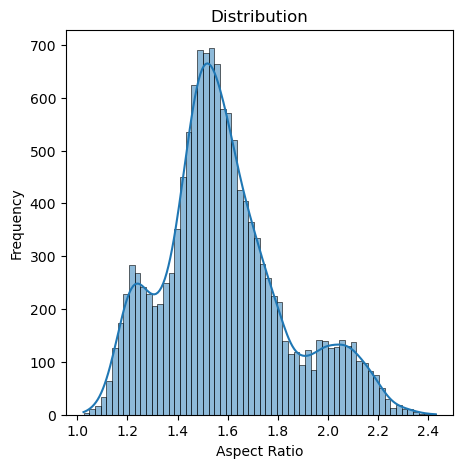

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.histplot(df['AspectRation'],kde=True)
plt.title('Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


the figure shows a left skewd data

#4.	How many unique "Class" categories are present in the dataset?

In [68]:
print(df['Class'].unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [70]:
#5.	Calculate the frequency distribution of each "Class." Which class appears the most, and which appears the least?

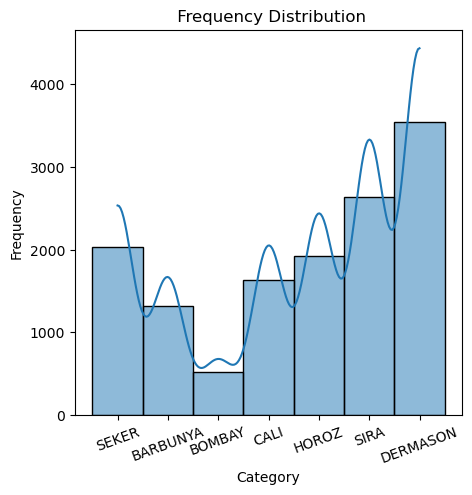

In [96]:
plt.figure(figsize=(5, 5))
sns.histplot(df['Class'], bins=30,kde=True)
plt.title(' Frequency Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=20)
plt.show()

DERMASON has the most frequenct above 3500.

In [76]:
#7.	Create a boxplot for "Area" across different classes. What does the boxplot reveal about the distribution of "Area" for each class?

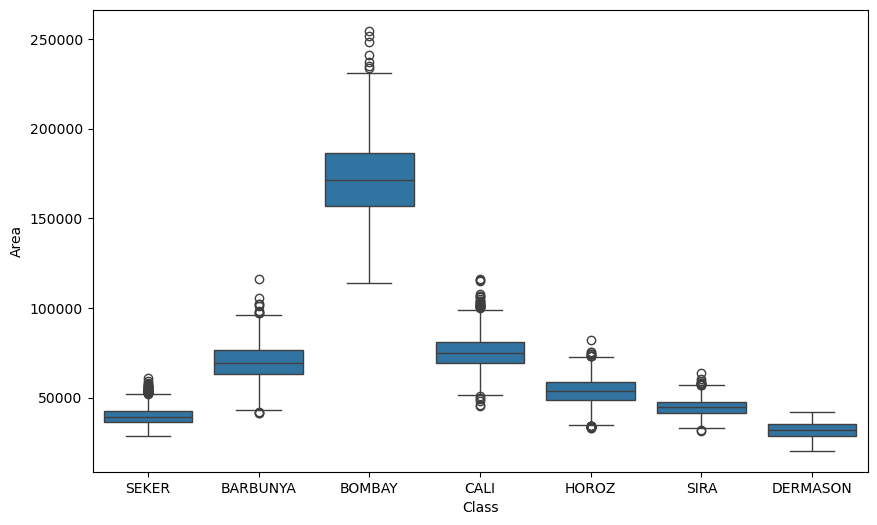

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Area', data=df)
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()

Question 2 : Adult Dataset

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split




In [113]:
df2 =pd.read_excel('dataset2.xlsx')

In [116]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [118]:
df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [120]:
df2.shape

(32561, 15)

In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [128]:
df2.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Since the dataset2 doesnot have any null values. There is no need to take care of the null values

In [166]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_col=df2['age','capital-gain']

KeyError: ('age', 'capital-gain')

In [164]:
sc.fit_transform 

TypeError: 'method' object is not subscriptable

In [160]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex' ]
le=LabelEncoder()
le.fit_transform

<bound method LabelEncoder.fit_transform of LabelEncoder()>

In [ ]:
X = df2['age','workclass',
y = df2['salary']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
